In [1]:
import torch
import numpy as np
from Desko import Koopman_Desko
from three_tanks import three_tank_system as dreamer
from replay_memory import ReplayMemory
from torch.utils.data import Dataset, DataLoader, random_split
import my_args
env = dreamer()
env = env.unwrapped


args = my_args.args
args['state_dim'] = env.observation_space.shape[0]
args['act_dim'] = env.action_space.shape[0]
A1 = torch.load(args['SAVE_A1'])
B1 = torch.load(args['SAVE_B1'])
C1 = torch.load(args['SAVE_C1'])

from matplotlib import pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'




c:\Users\90721\anaconda3\envs\lzy\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [2]:
model = Koopman_Desko(args)
model.parameter_restore(args)
# model.parameter_restore(args)
# replay_memory = ReplayMemory(args,env, predict_evolution=True)
# model.set_shift_and_scale(replay_memory)

restore!


In [3]:
test = torch.load(args['SAVE_TEST'])
train = torch.load(args['SAVE_TRAIN'])
val = torch.load(args['SAVE_VAL'])
# train = replay_memory.dataset_train



# test_data = DataLoader(dataset = test, batch_size = 1, shuffle = True, drop_last = True)

In [4]:
#测试集与训练集差别多大？

print(np.mean(test.x_choice))
print(np.std(test.x_choice))
print(np.mean(test.y_choice))
print(np.std(test.y_choice))


print(np.mean(train.dataset.x_choice))
print(np.std(train.dataset.x_choice))

0.09860649206332947
0.9711392904363109
-0.015293112
1.0028466
0.00040528068
1.000113


torch.Size([1, 16, 9])
tensor(0.0044, grad_fn=<MseLossBackward0>)


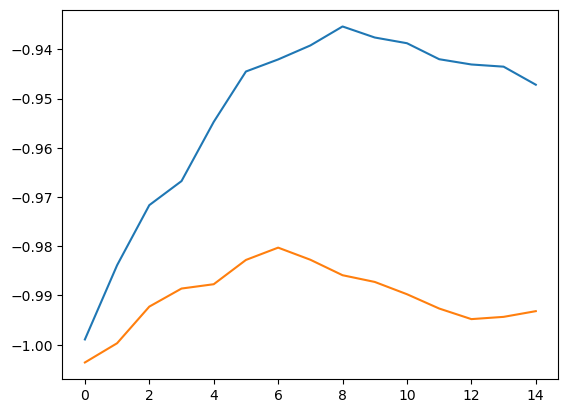

In [5]:
#查看片段
data_use = test
train_data = DataLoader(dataset = data_use, batch_size = 1, shuffle = True, drop_last = True)

state_start =0

for x,u in train_data:
    x = x[:,state_start:state_start+args['pred_horizon']]
    u = u[:,state_start:state_start+args['pred_horizon']]
    print(x.shape)
    x_pred_list,x_real_list,x_sum_list = model.pred_forward_test(x.float(),u.float(),data_use.test,args)
    break

x_pred_list = np.array(x_pred_list)
x_real_list = np.array(x_real_list)
x_sum_list = np.array(x_sum_list)
time_ = np.arange(x_pred_list[:,0,:1].shape[0])
# print(x_pred_list.shape)

num_state = 0
num_time = 0

plt.plot(time_,x_pred_list[:,num_time,num_state])
plt.plot(time_,x_real_list[:,num_time,num_state])
plt.show()


In [6]:

# x_pred_list.shape

In [7]:
x_pred_list.shape

(15, 1, 9)

In [8]:
torch.load(args['SAVE_C1'])

tensor([[ 2.6686e-01, -9.2751e-02, -7.5870e-02,  2.3983e-01, -1.1626e-01,
         -6.8596e-02,  2.1460e-01,  2.9764e-01, -7.3412e-02],
        [-1.6027e-01,  3.9521e-01, -6.3630e-02, -1.5482e-01,  3.7818e-01,
         -1.0879e-02,  8.2708e-02,  1.1421e-01, -3.7228e-02],
        [-5.6044e-02, -4.6594e-02,  3.2831e-01, -4.6967e-02, -2.6927e-02,
          3.0037e-01, -4.0837e-04, -2.6777e-02,  2.5787e-01],
        [ 2.4783e-01, -1.4329e-01, -2.7537e-02,  2.4225e-01, -1.3802e-01,
         -2.9712e-02,  2.0733e-01,  7.7983e-02, -2.6992e-02],
        [-1.4163e-01,  4.1558e-01,  3.1896e-02, -1.5289e-01,  3.3541e-01,
         -4.3505e-02, -6.9479e-02,  1.4464e-01,  2.0006e-02],
        [-2.4938e-02, -1.2167e-02,  2.4774e-01, -5.2009e-02,  2.0963e-02,
          3.2011e-01,  4.5853e-03,  7.3213e-02,  2.5868e-01],
        [ 1.8531e-01,  4.6960e-02, -2.9917e-03,  1.8664e-01, -6.3316e-03,
         -9.9347e-03,  5.1897e-01, -2.2005e-01, -1.6386e-02],
        [ 1.4410e-01,  8.6612e-02,  1.8241e-02, 

NameError: name 'torch' is not defined